#II. The Titanic Disaster

####Question 1. Join the Titanic: Machine Learning From Disaster competition on Kaggle. Download and preprocess the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
dftitanic = pd.read_csv(io.BytesIO(uploaded['train.csv']))
dftitanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
dftitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. Understand the data & features

1.1 Plot features

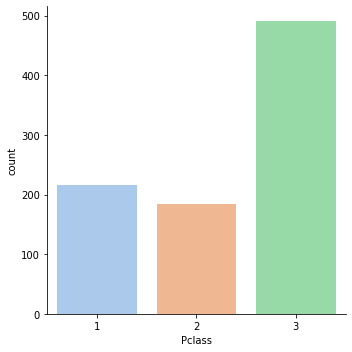

In [ ]:
sns.catplot(x="Pclass", kind="count", palette="pastel", data=dftitanic)

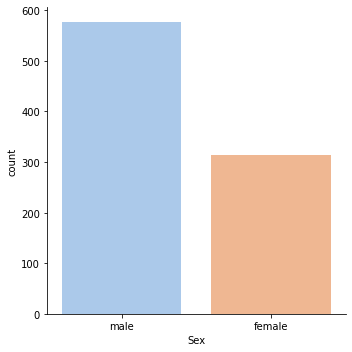

In [ ]:
sns.catplot(x="Sex", kind="count", palette="pastel", data=dftitanic)

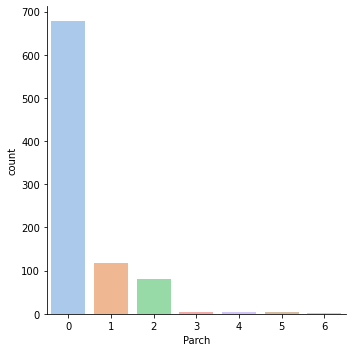

In [ ]:
sns.catplot(x="Parch", kind="count", palette="pastel", data=dftitanic)

[Text(0.5, 1.0, 'Histogram of Age')]

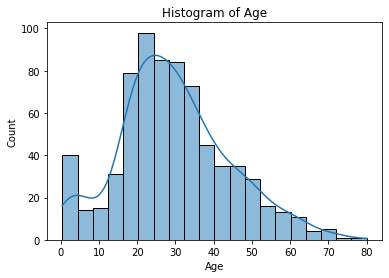

In [ ]:
#Plot histogram for continous features
sns.histplot(data=dftitanic, x='Age',kde=True).set(title='Histogram of Age')

[Text(0.5, 1.0, 'Histogram of Fare')]

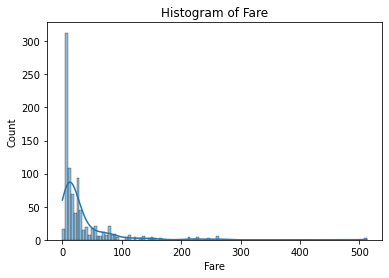

In [ ]:
sns.histplot(data=dftitanic, x='Fare',kde=True).set(title='Histogram of Fare')

1.2 Observe Correlations

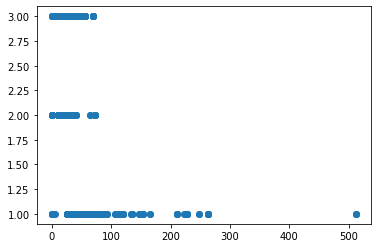

In [ ]:
plt.scatter(dftitanic['Fare'],dftitanic['Pclass'])

####Question 2. Implement logistic regression (it’s ok to use sklearn or similar software packages), try to predict whether a passenger survived the disaster with your model. Choose the features (or combinations of features) you would like to use or ignore, provided you justify your choice.

####2. Pre-process data

In [ ]:
#Normalize numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(dftitanic[['Age','SibSp','Parch','Fare']])
dftitanic[['Age','SibSp','Parch','Fare']] = pd.DataFrame(scaler.transform(
    dftitanic[['Age','SibSp','Parch','Fare']]))
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,0.432793,-0.473674,A/5 21171,-0.502445,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,0.432793,-0.473674,PC 17599,0.786845,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,0.432793,-0.473674,113803,0.420730,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,-0.474545,-0.473674,373450,-0.486337,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.185937,-0.474545,-0.473674,211536,-0.386671,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.737041,-0.474545,-0.473674,112053,-0.044381,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,0.432793,2.008933,W./C. 6607,-0.176263,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.254825,-0.474545,-0.473674,111369,-0.044381,C148,C


In [ ]:
#Transfer Plass to Categorical
dftitanic['Pclass']=pd.Categorical(dftitanic.Pclass)
dftitanic.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex              object
Age             float64
SibSp           float64
Parch           float64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [ ]:
#drop Cabin (not informative & too many nulls), Name(unique ID not informative), 
#Ticket (unique ID not informative), PassengerId(just an ordered ID)
dftitanic.drop(['Cabin','Name','Ticket','PassengerId'], inplace=True, axis=1)

In [ ]:
#Impute null entries
dftitanic['Age'].fillna(dftitanic['Age'].median(), inplace=True) 
#Mean can be to impute if we have normal distribution
dftitanic['Embarked'].fillna('Unknown', inplace=True)

In [ ]:
dftitanic['Embarked'].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

####3. Split into training data and validation data

In [ ]:
from sklearn.model_selection import train_test_split

X=dftitanic[dftitanic.columns.drop('Survived')]
X=pd.get_dummies(data=X,drop_first=True)
y=dftitanic['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, 
    test_size=0.3, random_state= 8)

####4. Run Logistic Regression

In [ ]:
#Check Significance
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

X_train1=sm.add_constant(X_train)

model1=sm.GLM(y_train,X_train1,family=sm.families.Binomial()).fit()
print(model1.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      612
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -272.11
Date:                Sun, 11 Sep 2022   Deviance:                       544.21
Time:                        21:15:10   Pearson chi2:                     636.
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.7480      0.365  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


No surprise that the Port of Embarkation has nothing to do to the survivalship. However, we're a bit surprised about low significance for feature "Fare", which might be 1) Not all fares are correctly recorded; 2)some correlation between Ticket Class & Fare

Also, the number of Parent/Children have low significance to the survivalship. Although p value for Sibling/Spouse is > 0.005, its coefficient suggest some obvious negative impact to the survivalship, so we will leave it in our model for now.

In [ ]:
#rerun model with significant features only
X_train2=sm.add_constant(X_train[['Pclass_2','Pclass_3','Sex_male',
                                  'Age','SibSp']])

model2=sm.GLM(y_train,X_train2,family=sm.families.Binomial()).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      617
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -274.50
Date:                Sun, 11 Sep 2022   Deviance:                       549.01
Time:                        21:15:10   Pearson chi2:                     647.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5857      0.276      9.352      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Train & Predict for Validation Set

model=LogisticRegression()
model.fit(X_train2,y_train)

X_val=sm.add_constant(X_val[['Pclass_2','Pclass_3','Sex_male','Age','SibSp']])
y_pred=pd.Series(model.predict(X_val))
y_val=y_val.reset_index(drop=True)

z=pd.concat([y_val,y_pred],axis=1)
z.columns=['True','Prediction']
z.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,True,Prediction
0,0,0
1,0,0
2,0,0
3,0,1
4,1,1


In [ ]:
#Performance of the model
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_val,y_pred))
print("Precision", metrics.precision_score(y_val,y_pred))
print("Recall", metrics.recall_score(y_val,y_pred))

Accuracy 0.7947761194029851
Precision 0.7777777777777778
Recall 0.63


Text(0.5, 15.0, 'Predicted')

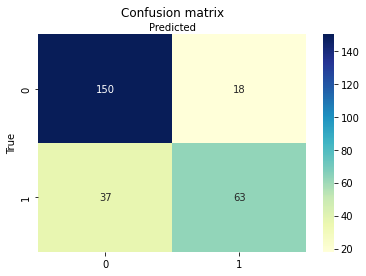

In [ ]:
#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_val,y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

####Question 3. Train your classifier using all of the training data, and test it using the testing data. Submit your results to Kaggle.

In [ ]:
#Train model with all training data
X=sm.add_constant(X[['Pclass_2','Pclass_3','Sex_male','Age','SibSp']])
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


LogisticRegression()

In [ ]:
uploaded2 = files.upload()

Saving test.csv to test.csv


In [ ]:
df_test = pd.read_csv(io.BytesIO(uploaded2['test.csv']))

In [ ]:
#clean test dataset

df_test[['Age','SibSp','Parch','Fare']] = pd.DataFrame(scaler.transform(
    df_test[['Age','SibSp','Parch','Fare']]))
df_test['Pclass']=pd.Categorical(df_test.Pclass)
df_test['Age'].fillna(dftitanic['Age'].median(), inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    float64 
 6   Parch        418 non-null    float64 
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
dtypes: category(1), float64(4), int64(1), object(5)
memory usage: 33.3+ KB


In [ ]:
X_test=pd.get_dummies(data=df_test,drop_first=True)
X_test=sm.add_constant(X_test[['Pclass_2','Pclass_3','Sex_male','Age','SibSp']])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
predictions=model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
output2 = pd.DataFrame({'PassengerId':df_test['PassengerId'].values,
                        'Pred_Survival': predictions},columns=['PassengerId',
                                                               'Pred_Survival'])


In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
output2.to_csv('/drive/My Drive/titanic.csv',index=False)